In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [109]:
dataset = pd.read_csv(r'C:\Users\HP\Desktop\SMART_HEALTH\Datasets\PIMARICIN_DIABETES\diabetes_csv.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [110]:
dataset.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


([<matplotlib.axis.YTick at 0x1aac87c2820>,
 [Text(0, 0, 'preg'),
  Text(0, 1, 'plas'),
  Text(0, 2, 'pres'),
  Text(0, 3, 'skin'),
  Text(0, 4, 'insu'),
  Text(0, 5, 'mass'),
  Text(0, 6, 'pedi'),
  Text(0, 7, 'age'),
  Text(0, 8, 'class')])

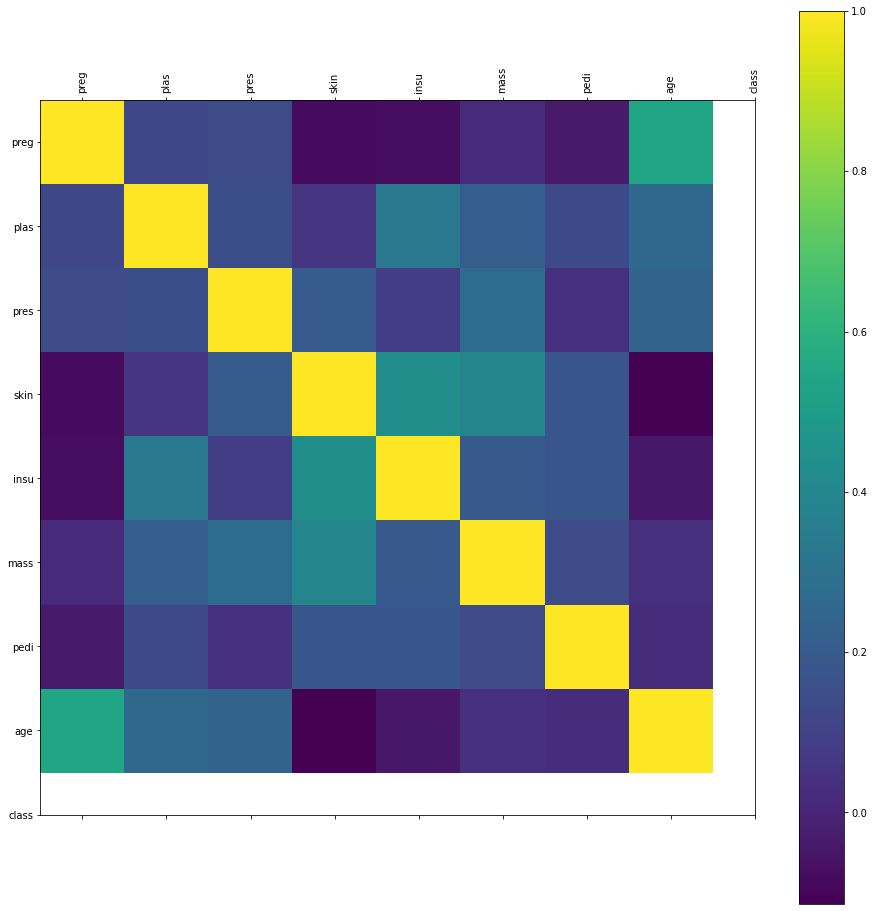

In [111]:
rcParams['figure.figsize'] = 16, 16
plt.matshow(dataset.corr())
plt.colorbar()
plt.xticks(np.arange(dataset.shape[1]), dataset.columns, rotation = 'vertical')
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)

In [112]:
dataset.head(5)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


array([[<AxesSubplot:title={'center':'preg'}>,
        <AxesSubplot:title={'center':'plas'}>,
        <AxesSubplot:title={'center':'pres'}>],
       [<AxesSubplot:title={'center':'skin'}>,
        <AxesSubplot:title={'center':'insu'}>,
        <AxesSubplot:title={'center':'mass'}>],
       [<AxesSubplot:title={'center':'pedi'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

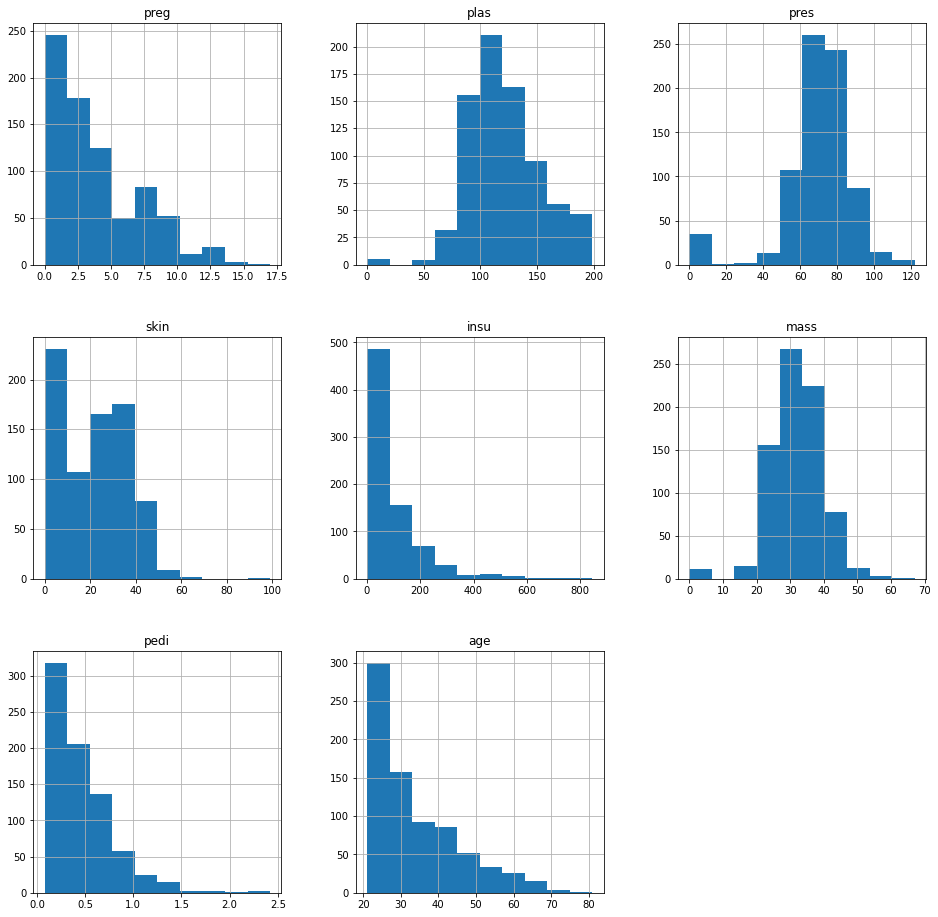

In [113]:
dataset.hist()

In [114]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [115]:
dataset['class'].replace('tested_positive', 1, inplace = True )
dataset['class'].replace('tested_negative', 0, inplace = True)

In [116]:
dataset.head(5)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [117]:
StdSclr = StandardScaler()
columns = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']
dataset[columns] = StdSclr.fit_transform(dataset[columns])

In [118]:
y = dataset['class']
x = dataset.drop(['class'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.26, random_state = 1)

In [119]:
#LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

LogisticRegression()

In [120]:
print('Accuracy = {}'.format(round(100*LR_model.score(x_test, y_test), 2)))

Accuracy = 78.0


In [121]:
#K-Neighbours
knn_score_lst = []
for i in range(4, 10):    
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(x_train, y_train)
    knn_score_lst.append(round(100*knn_model.score(x_test, y_test),2))


In [122]:
print(knn_score_lst)

[74.5, 79.5, 77.5, 77.5, 78.5, 78.5]


([<matplotlib.axis.XTick at 0x1aac8fbff40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

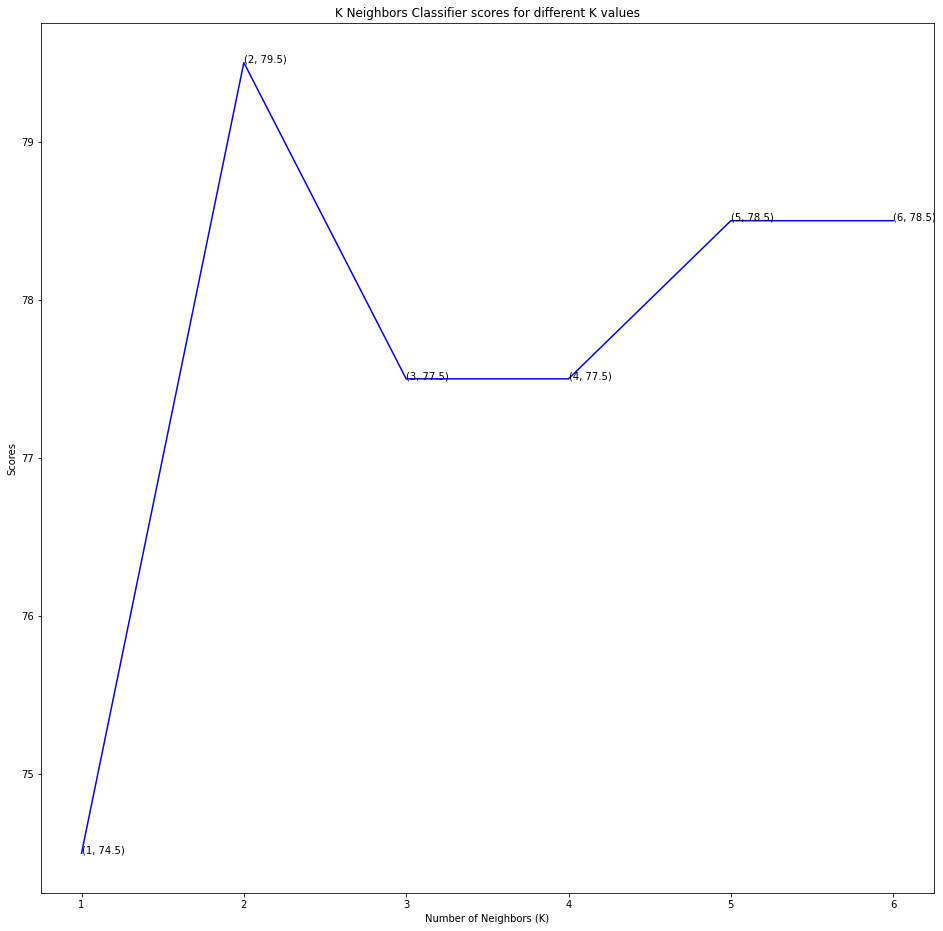

In [123]:
plt.plot([ i for i in range(1, 7)], knn_score_lst, color = 'blue')
for i in range(1, 7):
    plt.text( i, knn_score_lst[i-1], (i, knn_score_lst[i-1]))
plt.title('K Neighbors Classifier scores for different K values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.xticks([i for i in range( 1, 7)])

In [124]:
#decision tree

decision_tree_score_lst = []
for i in range(1, len(x.columns) + 1):
    dt_model = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_model.fit(x_train, y_train)
    decision_tree_score_lst.append(round(100*dt_model.score(x_test, y_test), 2))

([<matplotlib.axis.XTick at 0x1aac900e130>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

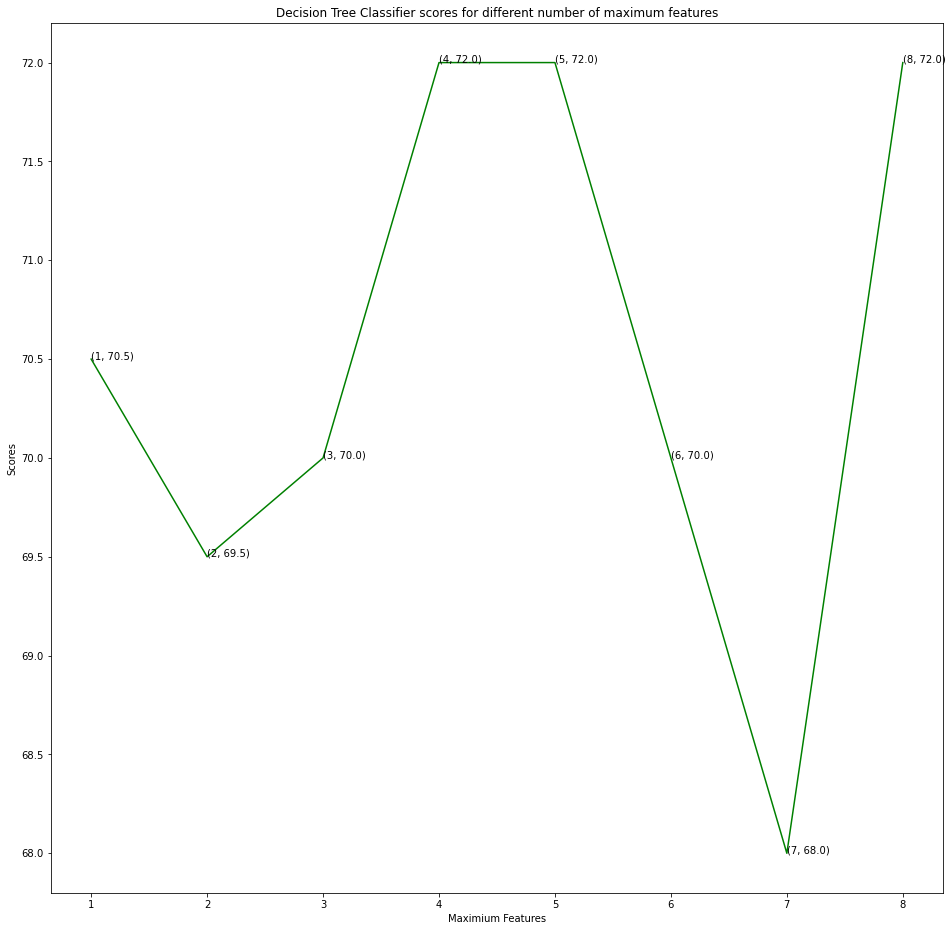

In [125]:
plt.plot([i for i in range(1, len(x.columns) + 1)], decision_tree_score_lst, color = 'green')
for i in range(1, len(x.columns) + 1):
    plt.text( i, decision_tree_score_lst[i-1], ( i, decision_tree_score_lst[i-1]))
plt.title("Decision Tree Classifier scores for different number of maximum features")
plt.xlabel("Maximium Features")
plt.ylabel("Scores")
plt.xticks([i for i in range(1, len(x.columns) + 1)])

In [126]:
#svm
svc_score_lst = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernels:
    svc_model = SVC(kernel = i)
    svc_model.fit(x_train, y_train)
    svc_score_lst.append(svc_model.score(x_test, y_test))

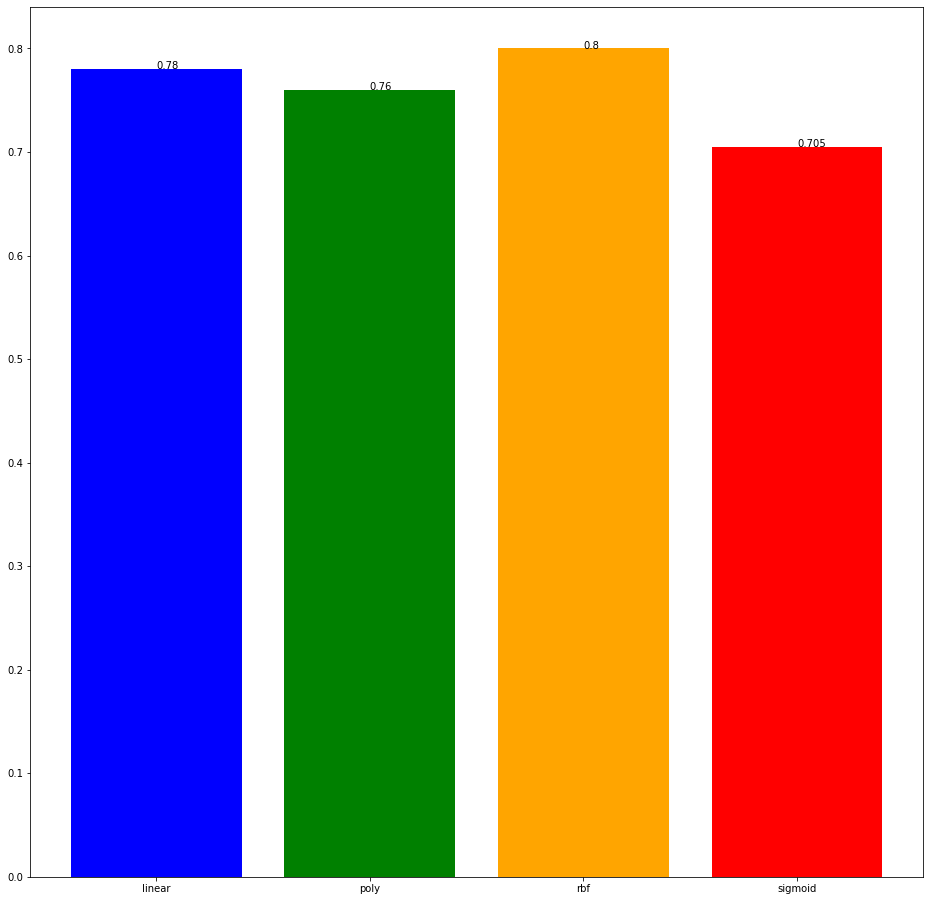

In [127]:
plt.bar(kernels, svc_score_lst, color = ['blue', 'green', 'orange', 'red'])
for i in range(len(kernels)):
    plt.text(i, svc_score_lst[i], round(svc_score_lst[i], 4))

In [128]:
#Naive bayes

Nb_model = GaussianNB()

Nb_model.fit(x_train, y_train)

Nb_model.score(x_test, y_test)

0.795

# Accuracy Comparision

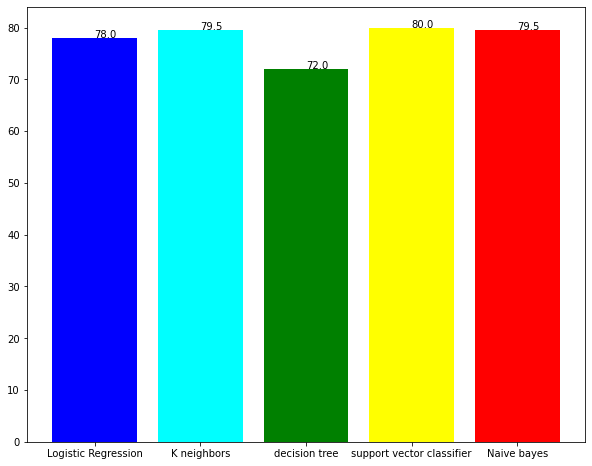

In [129]:
rcParams['figure.figsize'] = 10,8
lst_x = ['Logistic Regression', 'K neighbors', 'decision tree', 'support vector classifier', 'Naive bayes']
lst_y = [ 78.00, 79.50, 72.00, 80.00, 79.50 ]
plt.bar(lst_x, lst_y, color = ['blue', 'cyan', 'green', 'yellow', 'red'])
for i in range(len(lst_y)):
    plt.text(i, lst_y[i], lst_y[i])

# Diabetes

Clearly Naive Bayes gives best results.